# Introduction
In this notebook, I first introduced research questions regarding transit network and data sources, and I conducted data explorationa and analysis of transit network in NYMA. I combined and mapped the transit stations and lines of three dominating transit systems, including the New Jersey Rail, Long Island Railroad and Metro-North Railroad. This notebook only covers the initial comining and mapping of the transit network since my teammate and I will conduct analysis to answer the research questions in later weeks during the quarter.

# Research Questions
1. What’s the transit density of each county in the New York Metro Area?
2. Are counties with higher transit density popular migration destinations in the New York Metro Area?

# Data source

1. NJ Rail Lines: https://njogis-newjersey.opendata.arcgis.com/datasets/passenger-railroad-lines-in-nj
2. NJ Rail Stations: 
https://njogis-newjersey.opendata.arcgis.com/datasets/railroad-stations-in-nj
3. LIRR: https://catalog.data.gov/es_AR/dataset/long-island-railroad-map
4. Metro North Lines: https://maps.princeton.edu/catalog/nyu-2451-34755
5. Metro North Stations: https://maps.princeton.edu/catalog/nyu-2451-34756.

# Importing libraries

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px

# Data exploration

## Data exploration for transit lines

In [47]:
njrail=gpd.read_file('NJRail_line/Passenger_Railroad_Lines_in_NJ.shp')
njstation=gpd.read_file('NJRail_station/Railroad_Stations_in_NJ.shx')
lirail=gpd.read_file('nyu-2451-34753-geojson.json')
listation=gpd.read_file('nyu-2451-34754-geojson.json')
mnrail=gpd.read_file('MNStation/mnline.json')
mnstation=gpd.read_file('MNStation/stops.json')

In [4]:
#looking at first 5 rows of the njrail, lirail and mnrail datasets. 
njrail.head()

OBJECTID                RAIL_LINE        SERVICE     Shape_Leng  \
0         1  ATLANTIC CITY RAIL LINE           None  356957.019400   
1         2       BERGEN COUNTY LINE        HOBOKEN  155780.575084   
2         3                MAIN LINE        HOBOKEN  161721.051881   
3         4    MEADOWLANDS RAIL LINE           None   56328.562168   
4         5   MONTCLAIR BOONTON LINE  NEW YORK CITY  328910.733006   

   DATE_STAMP                                           geometry  
0  2016-08-30  LINESTRING (508669.853 193016.598, 505026.387 ...  
1  2013-11-04  LINESTRING (622908.638 692949.426, 620720.513 ...  
2  2013-11-04  LINESTRING (587611.064 830753.567, 588462.132 ...  
3  2013-11-04  LINESTRING (622908.638 692949.426, 620720.513 ...  
4  2013-11-04  LINESTRING (399357.761 735253.132, 399513.899 ...

In [5]:
lirail.head()

id  route_id      route_long  \
0  nyu_2451_34753.1        11         Belmont   
1  nyu_2451_34753.2        10  Port Jefferson   
2  nyu_2451_34753.3        12       City Zone   
3  nyu_2451_34753.4         1         Babylon   
4  nyu_2451_34753.5         3      Oyster Bay   

                                            geometry  
0  MULTILINESTRING ((-73.99309 40.75074, -73.9924...  
1  MULTILINESTRING ((-73.90300 40.74607, -73.9034...  
2  MULTILINESTRING ((-73.80933 40.69955, -73.8100...  
3  MULTILINESTRING ((-73.99309 40.75074, -73.9924...  
4  MULTILINESTRING ((-73.99309 40.75074, -73.9924...

In [6]:
mnrail.head()

id  route_id  route_long  \
0  nyu_2451_34755.1         1      Hudson   
1  nyu_2451_34755.2         3   New Haven   
2  nyu_2451_34755.3         2      Harlem   
3  nyu_2451_34755.4         5     Danbury   
4  nyu_2451_34755.5         4  New Canaan   

                                            geometry  
0  MULTILINESTRING ((-73.93795 41.70584, -73.9472...  
1  MULTILINESTRING ((-72.92175 41.30498, -72.9282...  
2  MULTILINESTRING ((-73.56220 41.81472, -73.5582...  
3  MULTILINESTRING ((-73.45016 41.39636, -73.4181...  
4  MULTILINESTRING ((-73.49563 41.14630, -73.4981...

As you can see from the first few rows of the three rail line datasets, they all have different columns, however, they all have a few things in common, including the name of each rail line and geometry, but those two columns in the three datasets have different names, so I need to change column names to merge them together into one new dataframe. 

In [7]:
list(njrail)

['OBJECTID', 'RAIL_LINE', 'SERVICE', 'Shape_Leng', 'DATE_STAMP', 'geometry']

In [8]:
njrail.columns=['id','linename','service','shape_leng','date_stamp','geometry']
njrail.head()

id                 linename        service     shape_leng  date_stamp  \
0   1  ATLANTIC CITY RAIL LINE           None  356957.019400  2016-08-30   
1   2       BERGEN COUNTY LINE        HOBOKEN  155780.575084  2013-11-04   
2   3                MAIN LINE        HOBOKEN  161721.051881  2013-11-04   
3   4    MEADOWLANDS RAIL LINE           None   56328.562168  2013-11-04   
4   5   MONTCLAIR BOONTON LINE  NEW YORK CITY  328910.733006  2013-11-04   

                                            geometry  
0  LINESTRING (508669.853 193016.598, 505026.387 ...  
1  LINESTRING (622908.638 692949.426, 620720.513 ...  
2  LINESTRING (587611.064 830753.567, 588462.132 ...  
3  LINESTRING (622908.638 692949.426, 620720.513 ...  
4  LINESTRING (399357.761 735253.132, 399513.899 ...

In [9]:
#Let's add a new column called "operating" to the mnrail dataframe to distinguish it from two other rail line dataframes.
njrail['Operating'] = 'New Jersey Railroad'
njrail.head()

id                 linename        service     shape_leng  date_stamp  \
0   1  ATLANTIC CITY RAIL LINE           None  356957.019400  2016-08-30   
1   2       BERGEN COUNTY LINE        HOBOKEN  155780.575084  2013-11-04   
2   3                MAIN LINE        HOBOKEN  161721.051881  2013-11-04   
3   4    MEADOWLANDS RAIL LINE           None   56328.562168  2013-11-04   
4   5   MONTCLAIR BOONTON LINE  NEW YORK CITY  328910.733006  2013-11-04   

                                            geometry            Operating  
0  LINESTRING (508669.853 193016.598, 505026.387 ...  New Jersey Railroad  
1  LINESTRING (622908.638 692949.426, 620720.513 ...  New Jersey Railroad  
2  LINESTRING (587611.064 830753.567, 588462.132 ...  New Jersey Railroad  
3  LINESTRING (622908.638 692949.426, 620720.513 ...  New Jersey Railroad  
4  LINESTRING (399357.761 735253.132, 399513.899 ...  New Jersey Railroad

In [10]:
list(lirail)

['id', 'route_id', 'route_long', 'geometry']

In [11]:
lirail.columns=['id','number','linename','geometry']
lirail.head()

id  number        linename  \
0  nyu_2451_34753.1      11         Belmont   
1  nyu_2451_34753.2      10  Port Jefferson   
2  nyu_2451_34753.3      12       City Zone   
3  nyu_2451_34753.4       1         Babylon   
4  nyu_2451_34753.5       3      Oyster Bay   

                                            geometry  
0  MULTILINESTRING ((-73.99309 40.75074, -73.9924...  
1  MULTILINESTRING ((-73.90300 40.74607, -73.9034...  
2  MULTILINESTRING ((-73.80933 40.69955, -73.8100...  
3  MULTILINESTRING ((-73.99309 40.75074, -73.9924...  
4  MULTILINESTRING ((-73.99309 40.75074, -73.9924...

In [12]:
#Let's add a new column called "operating" to the mnrail dataframe to distinguish it from two other rail line dataframes.
lirail['Operating'] = 'Long Island Railroad'
lirail.head()

id  number        linename  \
0  nyu_2451_34753.1      11         Belmont   
1  nyu_2451_34753.2      10  Port Jefferson   
2  nyu_2451_34753.3      12       City Zone   
3  nyu_2451_34753.4       1         Babylon   
4  nyu_2451_34753.5       3      Oyster Bay   

                                            geometry             Operating  
0  MULTILINESTRING ((-73.99309 40.75074, -73.9924...  Long Island Railroad  
1  MULTILINESTRING ((-73.90300 40.74607, -73.9034...  Long Island Railroad  
2  MULTILINESTRING ((-73.80933 40.69955, -73.8100...  Long Island Railroad  
3  MULTILINESTRING ((-73.99309 40.75074, -73.9924...  Long Island Railroad  
4  MULTILINESTRING ((-73.99309 40.75074, -73.9924...  Long Island Railroad

In [13]:
list(mnrail)

['id', 'route_id', 'route_long', 'geometry']

In [14]:
mnrail.columns=['id','number','linename','geometry']
mnrail.head()

id  number    linename  \
0  nyu_2451_34755.1       1      Hudson   
1  nyu_2451_34755.2       3   New Haven   
2  nyu_2451_34755.3       2      Harlem   
3  nyu_2451_34755.4       5     Danbury   
4  nyu_2451_34755.5       4  New Canaan   

                                            geometry  
0  MULTILINESTRING ((-73.93795 41.70584, -73.9472...  
1  MULTILINESTRING ((-72.92175 41.30498, -72.9282...  
2  MULTILINESTRING ((-73.56220 41.81472, -73.5582...  
3  MULTILINESTRING ((-73.45016 41.39636, -73.4181...  
4  MULTILINESTRING ((-73.49563 41.14630, -73.4981...

Now we have changed the names of shared columns (names and geometry) in three dataframe to the same names.

I also noticed that in the geometry columns of the three transit line datasets that they do not use the same geometry coordination system, so I'm going to change them to share the same coordination system.

In [15]:
lirail=lirail.to_crs('epsg:3424')
lirail.head()

id  number        linename  \
0  nyu_2451_34753.1      11         Belmont   
1  nyu_2451_34753.2      10  Port Jefferson   
2  nyu_2451_34753.3      12       City Zone   
3  nyu_2451_34753.4       1         Babylon   
4  nyu_2451_34753.5       3      Oyster Bay   

                                            geometry             Operating  
0  MULTILINESTRING ((632561.894 698796.549, 63274...  Long Island Railroad  
1  MULTILINESTRING ((657530.427 697249.579, 65739...  Long Island Railroad  
2  MULTILINESTRING ((683616.747 680493.214, 68342...  Long Island Railroad  
3  MULTILINESTRING ((632561.894 698796.549, 63274...  Long Island Railroad  
4  MULTILINESTRING ((632561.894 698796.549, 63274...  Long Island Railroad

In [16]:
mnrail=mnrail.to_crs('epsg:3424')
mnrail.head()

id  number    linename  \
0  nyu_2451_34755.1       1      Hudson   
1  nyu_2451_34755.2       3   New Haven   
2  nyu_2451_34755.3       2      Harlem   
3  nyu_2451_34755.4       5     Danbury   
4  nyu_2451_34755.5       4  New Canaan   

                                            geometry  
0  MULTILINESTRING ((645588.804 1046859.351, 6433...  
1  MULTILINESTRING ((925725.242 904249.608, 92398...  
2  MULTILINESTRING ((747752.029 1087426.164, 7489...  
3  MULTILINESTRING ((780145.485 935346.610, 78901...  
4  MULTILINESTRING ((768726.204 844093.227, 76815...

In [17]:
#Let's add a new column called "operating" to the mnrail dataframe to distinguish it from two other rail line dataframes.
mnrail['Operating'] = 'Metro North'
mnrail.head()

id  number    linename  \
0  nyu_2451_34755.1       1      Hudson   
1  nyu_2451_34755.2       3   New Haven   
2  nyu_2451_34755.3       2      Harlem   
3  nyu_2451_34755.4       5     Danbury   
4  nyu_2451_34755.5       4  New Canaan   

                                            geometry    Operating  
0  MULTILINESTRING ((645588.804 1046859.351, 6433...  Metro North  
1  MULTILINESTRING ((925725.242 904249.608, 92398...  Metro North  
2  MULTILINESTRING ((747752.029 1087426.164, 7489...  Metro North  
3  MULTILINESTRING ((780145.485 935346.610, 78901...  Metro North  
4  MULTILINESTRING ((768726.204 844093.227, 76815...  Metro North

Now the geometry columns of the three dataframes share the same coordination system, and we can merge them into one dataframe now. But before we do that, let's just look at the data types of the three dataframes.

In [18]:
#check datatypes of columns
njrail.dtypes

id               int64
linename        object
service         object
shape_leng     float64
date_stamp      object
geometry      geometry
Operating       object
dtype: object

In [19]:
lirail.dtypes

id             object
number          int64
linename       object
geometry     geometry
Operating      object
dtype: object

In [20]:
mnrail.dtypes

id             object
number          int64
linename       object
geometry     geometry
Operating      object
dtype: object

Let's combine the three rail line dataframe into a new one. 

In [21]:
linjrail = lirail.append(njrail)
nymarail=linjrail.append(mnrail)

In [22]:
#Let's sample the new datagframe with the combined rail lines to make sure there are values from all three dataframes. 
nymarail.sample(10)

id  number                  linename  \
8                  9     NaN            MORRIS & ESSEX   
20                21     NaN                RIVER LINE   
4   nyu_2451_34753.5     3.0                Oyster Bay   
29                30     NaN                     SEPTA   
17                18     NaN          PORT JERVIS LINE   
6                  7     NaN            MORRIS & ESSEX   
0                  1     NaN   ATLANTIC CITY RAIL LINE   
21                22     NaN  HUDSON BERGEN LIGHT RAIL   
5   nyu_2451_34753.6     2.0                 Hempstead   
2                  3     NaN                 MAIN LINE   

                                             geometry             Operating  \
8   LINESTRING (446012.803 687337.456, 446094.132 ...   New Jersey Railroad   
20  LINESTRING (316095.939 403450.376, 316096.891 ...   New Jersey Railroad   
4   MULTILINESTRING ((632561.894 698796.549, 63274...  Long Island Railroad   
29  LINESTRING (301113.611 409819.346, 301275.538 ...   New Jersey Railroad   
17  LINESTRING (622908.638 692949.426, 620720.513 ...   New Jersey Railroad   
6   LINESTRING (446012.803 687337.456, 446094.132 ...   New Jersey Railroad   
0   LINESTRING (508669.853 193016.598, 505026.387 ...   New Jersey Railroad   
21  MULTILINESTRING ((614528.455 683433.565, 61438...   New Jersey Railroad   
5   MULTILINESTRING ((632561.894 698796.549, 63274...  Long Island Railroad   
2   LINESTRING (587611.064 830753.567, 588462.132 ...   New Jersey Railroad   

                              service     shape_leng  date_stamp  
8   MIDTOWN DIRECT VIA GLADSTONE LINE  237101.943694  2013-11-04  
20                               None  178427.379126  2014-06-27  
4                                 NaN            NaN         NaN  
29                  WEST TRENTON LINE  179332.779356  2016-08-30  
17             VIA BERGEN COUNTY LINE  508072.868956  2013-11-04  
6               HOBOKEN VIA GLADSTONE  223151.889045  2013-11-04  
0                                None  356957.019400  2016-08-30  
21                               None   84752.100389  2014-06-27  
5                                 NaN            NaN         NaN  
2                             HOBOKEN  161721.051881  2013-11-04

In [23]:
#Let's clean up the data a little more and get rid of the columns where there are some rows without value.
columns_to_keep=['linename','geometry','Operating']
nymarail=nymarail[columns_to_keep]
nymarail.sample(10)

linename                                           geometry  \
2                   Harlem  MULTILINESTRING ((747752.029 1087426.164, 7489...   
6           MORRIS & ESSEX  LINESTRING (446012.803 687337.456, 446094.132 ...   
1           Port Jefferson  MULTILINESTRING ((657530.427 697249.579, 65739...   
4   MONTCLAIR BOONTON LINE  LINESTRING (399357.761 735253.132, 399513.899 ...   
8           MORRIS & ESSEX  LINESTRING (446012.803 687337.456, 446094.132 ...   
3    MEADOWLANDS RAIL LINE  LINESTRING (622908.638 692949.426, 620720.513 ...   
11          West Hempstead  MULTILINESTRING ((683681.521 680482.988, 68361...   
4               Oyster Bay  MULTILINESTRING ((632561.894 698796.549, 63274...   
19                   SEPTA  LINESTRING (421410.675 504820.167, 421246.279 ...   
28                    PATH  MULTILINESTRING ((621068.883 690997.491, 62107...   

               Operating  
2            Metro North  
6    New Jersey Railroad  
1   Long Island Railroad  
4    New Jersey Railroad  
8    New Jersey Railroad  
3    New Jersey Railroad  
11  Long Island Railroad  
4   Long Island Railroad  
19   New Jersey Railroad  
28   New Jersey Railroad

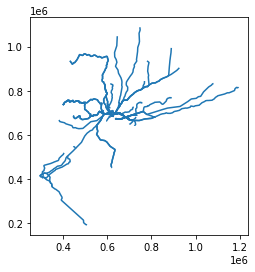

In [24]:
#Let's plot the combined rail lines onto the map
nymarail.plot()

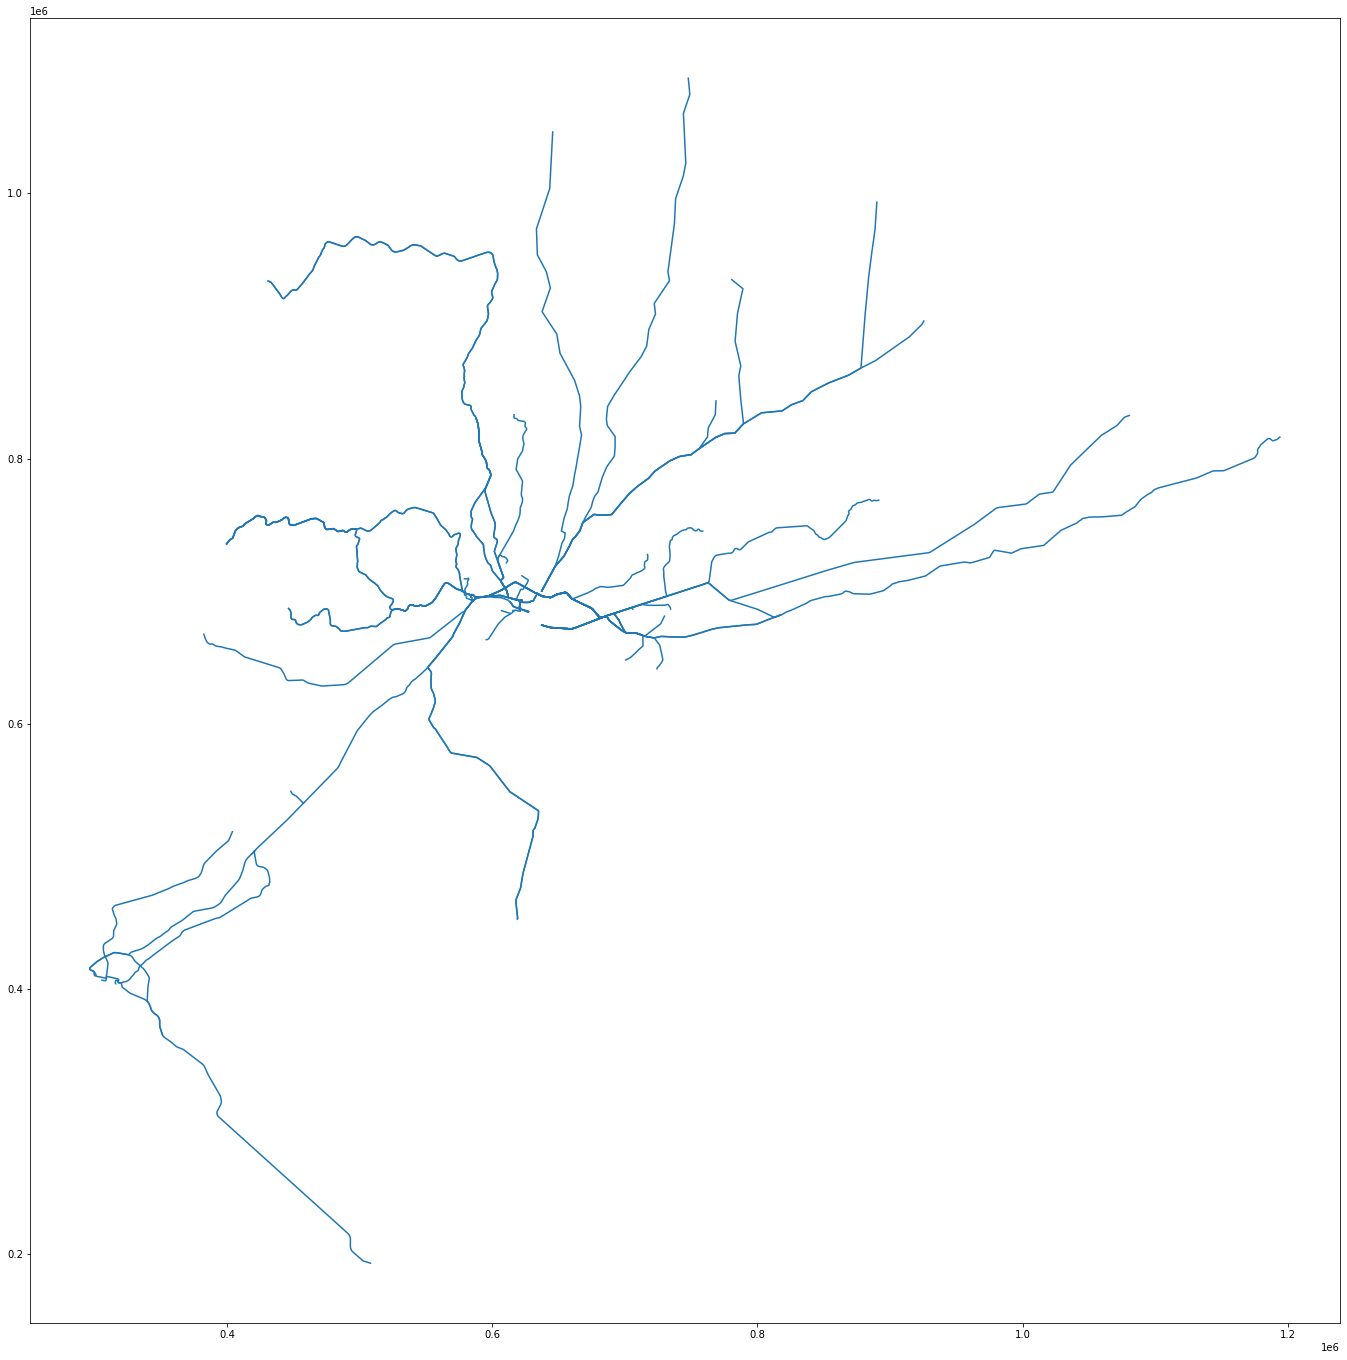

In [25]:
#Let's make it look better
nymarail.plot(figsize=(40,24)) 

## Data exploration for transit stations

Let's do the same thing with the station datasets.

In [48]:
#looking at first 5 rows of the njstation, listation and mnstation datasets. 
njstation.head()

OBJECTID    COUNTY   LATITUDE  LONGITUDE         STATION  \
0         1     OCEAN  40.092718 -74.048192  Point Pleasant   
1         2  MONMOUTH  40.150567 -74.035460     Spring Lake   
2         3  MONMOUTH  40.180589 -74.027296          Belmar   
3         4  MONMOUTH  40.203775 -74.018956   Bradley Beach   
4         5  MONMOUTH  40.215360 -74.014788     Asbury Park   

                 RAIL_LINE                     MUN_LABEL   ATIS_ID AMTRAK  \
0  North Jersey Coast Line  Point Pleasant Beach Borough  RAIL0122      N   
1  North Jersey Coast Line           Spring Lake Borough  RAIL0141      N   
2  North Jersey Coast Line                Belmar Borough  RAIL0015      N   
3  North Jersey Coast Line         Bradley Beach Borough  RAIL0022      N   
4  North Jersey Coast Line              Asbury Park City  RAIL0008      N   

                        geometry  
0  POINT (618521.134 459008.903)  
1  POINT (621972.996 480099.144)  
2  POINT (624196.751 491047.221)  
3  POINT (626480.961 499505.650)  
4  POINT (627622.290 503731.988)

In [49]:
listation.head()

id  stop_id            stop_name  stop_lat  stop_lon  geoid  \
0  nyu_2451_34754.1        1     Long Island City  40.74128 -73.95639  36081   
1  nyu_2451_34754.2        2  Hunterspoint Avenue  40.74238 -73.94679  36081   
2  nyu_2451_34754.3        8         Penn Station  40.75058 -73.99358  36061   
3  nyu_2451_34754.4        9             Woodside  40.74584 -73.90297  36081   
4  nyu_2451_34754.5       10         Forest Hills  40.71957 -73.84481  36081   

          namelsad                    geometry  
0    Queens County  POINT (-73.95639 40.74128)  
1    Queens County  POINT (-73.94679 40.74238)  
2  New York County  POINT (-73.99358 40.75058)  
3    Queens County  POINT (-73.90297 40.74584)  
4    Queens County  POINT (-73.84481 40.71957)

There are 277 stations in the NJ Rail network and some has multiple values, meaning there are more than 1 lines intersecting at those staions.

In [50]:
mnstation.head()

id  stop_id           stop_name   stop_lat   stop_lon  \
0  nyu_2451_34756.1        1       Grand Central  40.752998 -73.977056   
1  nyu_2451_34756.2        4    Harlem-125th St.  40.805157 -73.939149   
2  nyu_2451_34756.3      622    Yankees-E153 St.  40.825300 -73.929900   
3  nyu_2451_34756.4        9      Morris Heights  40.854252 -73.919583   
4  nyu_2451_34756.5       10  University Heights  40.862248 -73.913120   

   wheelchair  geoid         namelsad                    geometry  
0           1  36061  New York County  POINT (-73.97706 40.75300)  
1           1  36061  New York County  POINT (-73.93915 40.80516)  
2           1  36005     Bronx County  POINT (-73.92990 40.82530)  
3           1  36005     Bronx County  POINT (-73.91958 40.85425)  
4           1  36005     Bronx County  POINT (-73.91312 40.86225)

Again, three dataframes share the names and the geometry columns, and let's change the names of those two columns. From the data exploration and analysis for the rail line dataframes, I know I don't need to keep all the columns as well, so I will drop the columns that are not shared across the dataframes.

In [51]:
list(njstation)

['OBJECTID',
 'COUNTY',
 'LATITUDE',
 'LONGITUDE',
 'STATION',
 'RAIL_LINE',
 'MUN_LABEL',
 'ATIS_ID',
 'AMTRAK',
 'geometry']

In [52]:
columns_to_keep=['STATION','LATITUDE','LONGITUDE','geometry']
njstation=njstation[columns_to_keep]
njstation.head()

STATION   LATITUDE  LONGITUDE                       geometry
0  Point Pleasant  40.092718 -74.048192  POINT (618521.134 459008.903)
1     Spring Lake  40.150567 -74.035460  POINT (621972.996 480099.144)
2          Belmar  40.180589 -74.027296  POINT (624196.751 491047.221)
3   Bradley Beach  40.203775 -74.018956  POINT (626480.961 499505.650)
4     Asbury Park  40.215360 -74.014788  POINT (627622.290 503731.988)

In [53]:
njstation.columns=['stationname','lat','lon','geometry']
njstation

stationname        lat        lon                       geometry
0    Point Pleasant  40.092718 -74.048192  POINT (618521.134 459008.903)
1       Spring Lake  40.150567 -74.035460  POINT (621972.996 480099.144)
2            Belmar  40.180589 -74.027296  POINT (624196.751 491047.221)
3     Bradley Beach  40.203775 -74.018956  POINT (626480.961 499505.650)
4       Asbury Park  40.215360 -74.014788  POINT (627622.290 503731.988)
..              ...        ...        ...                            ...
280         Bristol  40.105037 -74.854642  POINT (392929.771 463373.005)
281         Croydon  40.093575 -74.906575  POINT (378384.438 459260.172)
282       Eddington  40.082994 -74.933703  POINT (370776.718 455441.562)
283          Tacony  40.023226 -75.039024  POINT (341176.327 433831.875)
284       Levittown  40.140259 -74.817016  POINT (403499.492 476163.107)

[285 rows x 4 columns]

In [54]:
njstation['Operating'] = 'New Jersey Railroad'
njstation.head()

stationname        lat        lon                       geometry  \
0  Point Pleasant  40.092718 -74.048192  POINT (618521.134 459008.903)   
1     Spring Lake  40.150567 -74.035460  POINT (621972.996 480099.144)   
2          Belmar  40.180589 -74.027296  POINT (624196.751 491047.221)   
3   Bradley Beach  40.203775 -74.018956  POINT (626480.961 499505.650)   
4     Asbury Park  40.215360 -74.014788  POINT (627622.290 503731.988)   

             Operating  
0  New Jersey Railroad  
1  New Jersey Railroad  
2  New Jersey Railroad  
3  New Jersey Railroad  
4  New Jersey Railroad

In [55]:
list(listation)

['id',
 'stop_id',
 'stop_name',
 'stop_lat',
 'stop_lon',
 'geoid',
 'namelsad',
 'geometry']

In [56]:
columns_to_keep=['stop_name','stop_lat','stop_lon','geometry']
listation=listation[columns_to_keep]
listation.head()

stop_name  stop_lat  stop_lon                    geometry
0     Long Island City  40.74128 -73.95639  POINT (-73.95639 40.74128)
1  Hunterspoint Avenue  40.74238 -73.94679  POINT (-73.94679 40.74238)
2         Penn Station  40.75058 -73.99358  POINT (-73.99358 40.75058)
3             Woodside  40.74584 -73.90297  POINT (-73.90297 40.74584)
4         Forest Hills  40.71957 -73.84481  POINT (-73.84481 40.71957)

In [57]:
listation.columns=['stationname','lat','lon','geometry']
listation.head()

stationname       lat       lon                    geometry
0     Long Island City  40.74128 -73.95639  POINT (-73.95639 40.74128)
1  Hunterspoint Avenue  40.74238 -73.94679  POINT (-73.94679 40.74238)
2         Penn Station  40.75058 -73.99358  POINT (-73.99358 40.75058)
3             Woodside  40.74584 -73.90297  POINT (-73.90297 40.74584)
4         Forest Hills  40.71957 -73.84481  POINT (-73.84481 40.71957)

In [58]:
listation['Operating'] = 'Long Island Railroad'
listation.head()

stationname       lat       lon                    geometry  \
0     Long Island City  40.74128 -73.95639  POINT (-73.95639 40.74128)   
1  Hunterspoint Avenue  40.74238 -73.94679  POINT (-73.94679 40.74238)   
2         Penn Station  40.75058 -73.99358  POINT (-73.99358 40.75058)   
3             Woodside  40.74584 -73.90297  POINT (-73.90297 40.74584)   
4         Forest Hills  40.71957 -73.84481  POINT (-73.84481 40.71957)   

              Operating  
0  Long Island Railroad  
1  Long Island Railroad  
2  Long Island Railroad  
3  Long Island Railroad  
4  Long Island Railroad

In [59]:
columns_to_keep=['stop_name','stop_lat','stop_lon','geometry']
mnstation=mnstation[columns_to_keep]
mnstation.head()

stop_name   stop_lat   stop_lon                    geometry
0       Grand Central  40.752998 -73.977056  POINT (-73.97706 40.75300)
1    Harlem-125th St.  40.805157 -73.939149  POINT (-73.93915 40.80516)
2    Yankees-E153 St.  40.825300 -73.929900  POINT (-73.92990 40.82530)
3      Morris Heights  40.854252 -73.919583  POINT (-73.91958 40.85425)
4  University Heights  40.862248 -73.913120  POINT (-73.91312 40.86225)

In [60]:
mnstation.columns=['stationname','lat','lon','geometry']
mnstation.head()

stationname        lat        lon                    geometry
0       Grand Central  40.752998 -73.977056  POINT (-73.97706 40.75300)
1    Harlem-125th St.  40.805157 -73.939149  POINT (-73.93915 40.80516)
2    Yankees-E153 St.  40.825300 -73.929900  POINT (-73.92990 40.82530)
3      Morris Heights  40.854252 -73.919583  POINT (-73.91958 40.85425)
4  University Heights  40.862248 -73.913120  POINT (-73.91312 40.86225)

In [61]:
mnstation['Operating'] = 'Metro North Railroad'
mnstation.head()

stationname        lat        lon                    geometry  \
0       Grand Central  40.752998 -73.977056  POINT (-73.97706 40.75300)   
1    Harlem-125th St.  40.805157 -73.939149  POINT (-73.93915 40.80516)   
2    Yankees-E153 St.  40.825300 -73.929900  POINT (-73.92990 40.82530)   
3      Morris Heights  40.854252 -73.919583  POINT (-73.91958 40.85425)   
4  University Heights  40.862248 -73.913120  POINT (-73.91312 40.86225)   

              Operating  
0  Metro North Railroad  
1  Metro North Railroad  
2  Metro North Railroad  
3  Metro North Railroad  
4  Metro North Railroad

Now we have changed the column names for station and geometry to the same across the three dataframes, but I noticed that the coordination system for geometry columns are different, I need to change them to the same coordination system for mapping purpose

In [62]:
listation=listation.to_crs('epsg:3424')
listation.head()

stationname       lat       lon                       geometry  \
0     Long Island City  40.74128 -73.95639  POINT (642750.072 695409.903)   
1  Hunterspoint Avenue  40.74238 -73.94679  POINT (645407.555 695827.249)   
2         Penn Station  40.75058 -73.99358  POINT (632425.769 698736.255)   
3             Woodside  40.74584 -73.90297  POINT (657540.623 697167.271)   
4         Forest Hills  40.71957 -73.84481  POINT (673726.190 687712.061)   

              Operating  
0  Long Island Railroad  
1  Long Island Railroad  
2  Long Island Railroad  
3  Long Island Railroad  
4  Long Island Railroad

In [63]:
mnstation=mnstation.to_crs('epsg:3424')
mnstation.head()

stationname        lat        lon                       geometry  \
0       Grand Central  40.752998 -73.977056  POINT (636998.419 699643.976)   
1    Harlem-125th St.  40.805157 -73.939149  POINT (647378.517 718710.419)   
2    Yankees-E153 St.  40.825300 -73.929900  POINT (649891.090 726065.105)   
3      Morris Heights  40.854252 -73.919583  POINT (652676.295 736631.220)   
4  University Heights  40.862248 -73.913120  POINT (654444.539 739556.129)   

              Operating  
0  Metro North Railroad  
1  Metro North Railroad  
2  Metro North Railroad  
3  Metro North Railroad  
4  Metro North Railroad

Time to combine the three dataframes.

In [64]:
linjstation= listation.append(njstation)
nymastation=linjstation.append(mnstation)
nymastation.sample(10)

stationname        lat        lon                        geometry  \
186  Liberty State Park  40.710375 -74.055813   POINT (615258.507 683996.307)   
195         E. 22nd St.  40.661304 -74.116456   POINT (598525.575 666040.662)   
27         North Branch  40.592027 -74.683792   POINT (441085.674 640625.347)   
90             Bay Head  40.077189 -74.046181   POINT (619112.507 453355.211)   
93              Danbury  41.396363 -73.450163   POINT (780145.485 935346.610)   
2      Yankees-E153 St.  40.825300 -73.929900   POINT (649891.090 726065.105)   
63          Mount Olive  40.907384 -74.730645   POINT (428376.443 755539.676)   
120       Bridgehampton  40.938980 -72.310050  POINT (1097142.363 774544.545)   
121        East Hampton  40.965080 -72.193240  POINT (1129164.812 784884.410)   
16           Douglaston  40.768060 -73.749410   POINT (700017.690 705588.664)   

                Operating  
186   New Jersey Railroad  
195   New Jersey Railroad  
27    New Jersey Railroad  
90    New Jersey Railroad  
93   Metro North Railroad  
2    Metro North Railroad  
63    New Jersey Railroad  
120  Long Island Railroad  
121  Long Island Railroad  
16   Long Island Railroad

Time to plot the combined station dataframe onto the map

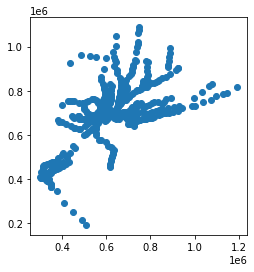

In [65]:
nymastation.plot()

Let's make it look better:

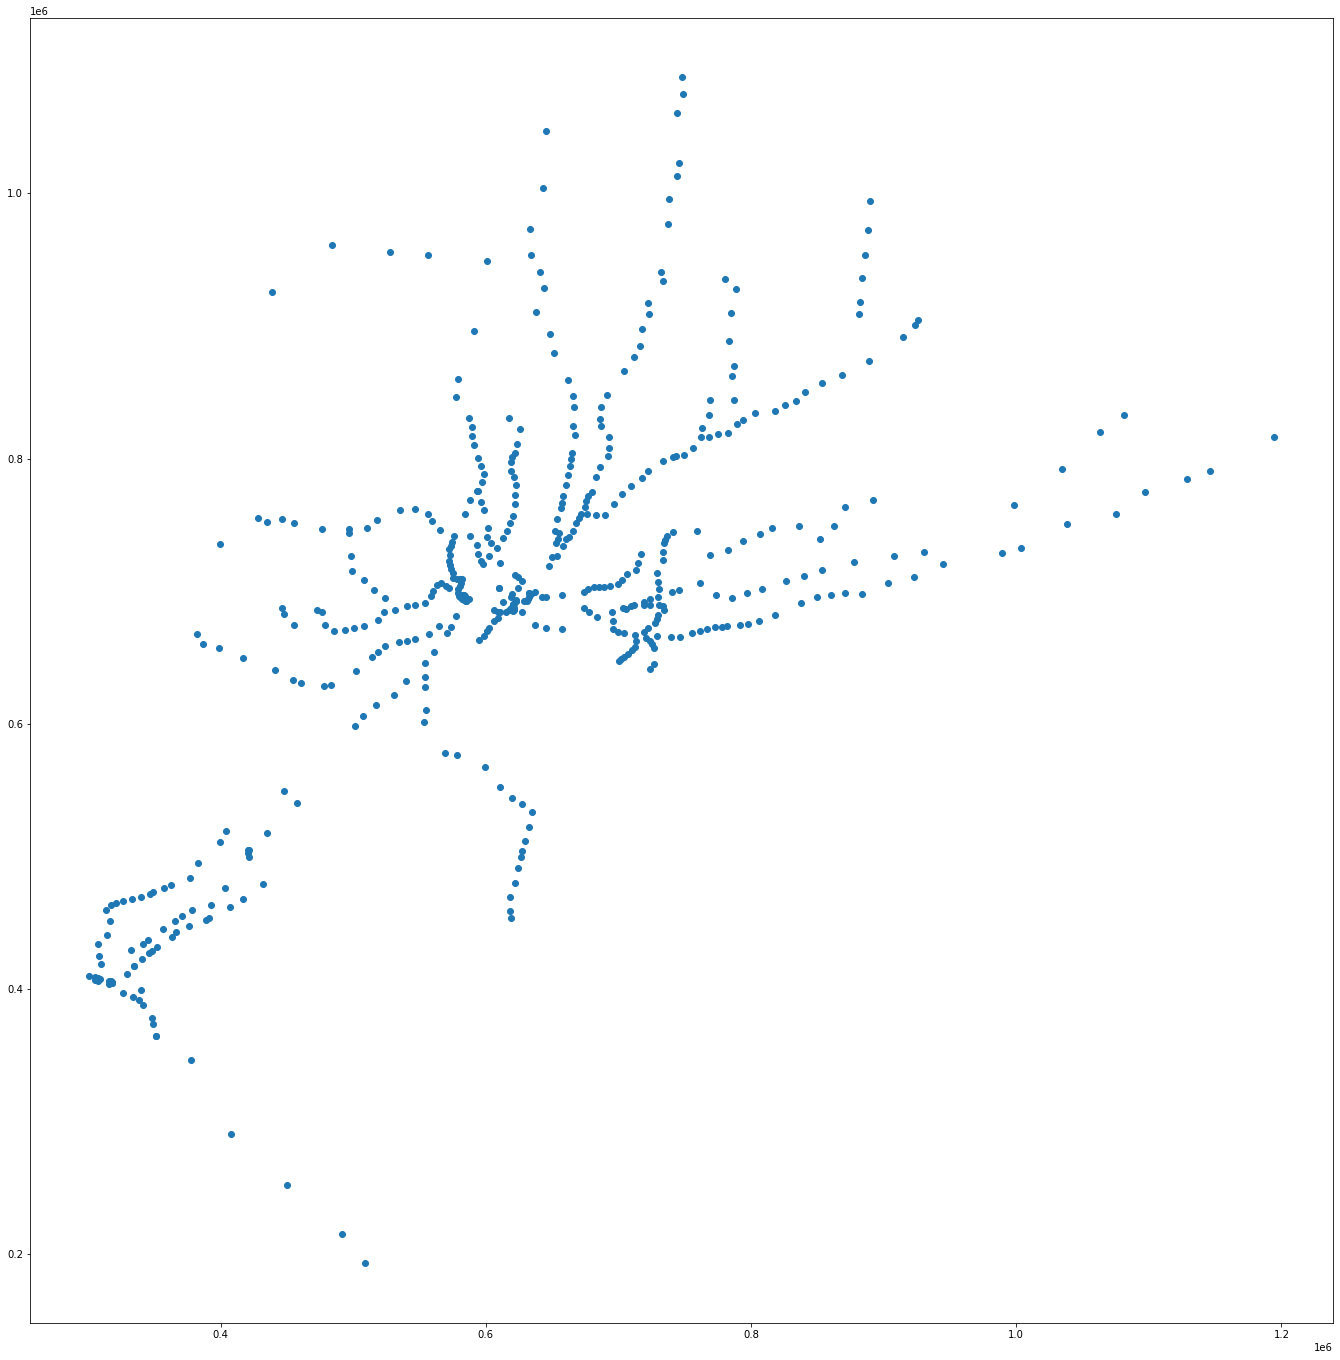

In [66]:
nymastation.plot(
            figsize=(40,24)) 

# Data analysis

Now I have the two new dataframes with combines lines and stations, I want to plot them onto the county boundary map.

In [44]:
#import county boundary shapefile
cb=gpd.read_file('NYMRcb')

In [45]:
#quick look at the dataframe--I'm looking at geometry column especially to see if there is a need to convert the coordination system
cb.head()

cartodb_id statefp countyfp  geoid                            name  \
0           1      09      001  09001   Fairfield County, Connecticut   
1          10      34      025  34025     Monmouth County, New Jersey   
2          25      36      081  36081         Queens County, New York   
3           2      09      005  09005  Litchfield County, Connecticut   
4          19      36      027  36027       Dutchess County, New York   

  subregid     atotal      aland  pop_10e  pop_10m  ...  cr_oth_e  \
0       CT  836.91795  624.96958   916829        0  ...       344   
1      ONJ  665.31546  468.40775   630380        0  ...         0   
2      NYC  178.03032  108.76805  2230722        0  ...      9887   
3       CT  944.55528  920.56844   189927        0  ...         0   
4      MHV  825.34308  795.63519   297488        0  ...        77   

      cr_oth_m    cr_oth_c  cr_hom_e     cr_hom_m  cr_hom_c  iscommap  \
0   363.225722   64.187765         0     0.000000  0.000000         0   
1     0.000000    0.000000         0     0.000000  0.000000         0   
2  1864.166774   11.461840     35072  3689.568791  6.395127         0   
3     0.000000    0.000000         0     0.000000  0.000000         0   
4   132.008047  104.218251         0     0.000000  0.000000         0   

   iscomnycre  iscomnycwo                                           geometry  
0           1           1  MULTIPOLYGON (((-73.60428 41.01486, -73.60471 ...  
1           1           1  MULTIPOLYGON (((-73.99367 40.23651, -73.99377 ...  
2           1           1  MULTIPOLYGON (((-73.83039 40.60801, -73.83033 ...  
3           1           1  POLYGON ((-72.98325 41.63960, -73.00315 41.629...  
4           1           1  POLYGON ((-73.48731 42.04964, -73.48731 42.049...  

[5 rows x 222 columns]

In [46]:
#convert the coordination system to match with the line and station dataframes
cb=cb.to_crs('epsg:3424')
cb.head()

cartodb_id statefp countyfp  geoid                            name  \
0           1      09      001  09001   Fairfield County, Connecticut   
1          10      34      025  34025     Monmouth County, New Jersey   
2          25      36      081  36081         Queens County, New York   
3           2      09      005  09005  Litchfield County, Connecticut   
4          19      36      027  36027       Dutchess County, New York   

  subregid     atotal      aland  pop_10e  pop_10m  ...  cr_oth_e  \
0       CT  836.91795  624.96958   916829        0  ...       344   
1      ONJ  665.31546  468.40775   630380        0  ...         0   
2      NYC  178.03032  108.76805  2230722        0  ...      9887   
3       CT  944.55528  920.56844   189927        0  ...         0   
4      MHV  825.34308  795.63519   297488        0  ...        77   

      cr_oth_m    cr_oth_c  cr_hom_e     cr_hom_m  cr_hom_c  iscommap  \
0   363.225722   64.187765         0     0.000000  0.000000         0   
1     0.000000    0.000000         0     0.000000  0.000000         0   
2  1864.166774   11.461840     35072  3689.568791  6.395127         0   
3     0.000000    0.000000         0     0.000000  0.000000         0   
4   132.008047  104.218251         0     0.000000  0.000000         0   

   iscomnycre  iscomnycwo                                           geometry  
0           1           1  MULTIPOLYGON (((739294.387 795879.033, 739178....  
1           1           1  MULTIPOLYGON (((633476.713 511467.499, 633447....  
2           1           1  MULTIPOLYGON (((678032.841 647101.049, 678050....  
3           1           1  POLYGON ((906689.771 1025869.682, 901318.076 1...  
4           1           1  POLYGON ((767152.805 1173256.139, 767152.776 1...  

[5 rows x 222 columns]

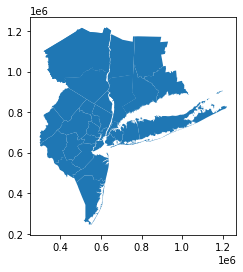

In [47]:
cb.plot()

Let's make it look better and put the line dataframe onto the county border map

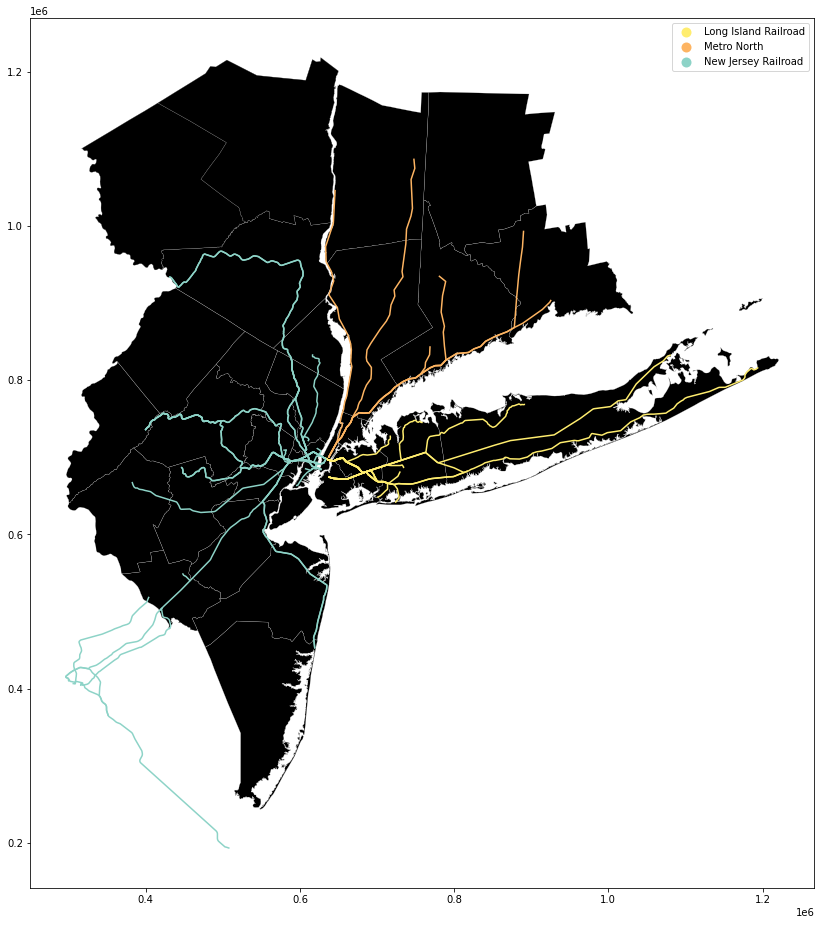

In [51]:
fig, ax = plt.subplots(figsize = (20,16)) 
nymarail.plot(column = 'Operating',cmap = 'Set3_r', legend=True, ax=ax)
cb.geometry.plot(color='black',edgecolor='gainsboro',linewidth = 0.2,ax=ax) 

In [52]:
#Let's add the stations on to the county boundary map
stationincounty = gpd.sjoin(nymastation, cb, op='within') 

In [53]:
stationincounty.head()

stationname       lat       lon                       geometry  \
0     Long Island City  40.74128 -73.95639  POINT (642750.072 695409.903)   
1  Hunterspoint Avenue  40.74238 -73.94679  POINT (645407.555 695827.249)   
3             Woodside  40.74584 -73.90297  POINT (657540.623 697167.271)   
4         Forest Hills  40.71957 -73.84481  POINT (673726.190 687712.061)   
5          Kew Gardens  40.70964 -73.83089  POINT (677612.026 684123.665)   

              Operating  index_right  cartodb_id statefp countyfp  geoid  ...  \
0  Long Island Railroad            2          25      36      081  36081  ...   
1  Long Island Railroad            2          25      36      081  36081  ...   
3  Long Island Railroad            2          25      36      081  36081  ...   
4  Long Island Railroad            2          25      36      081  36081  ...   
5  Long Island Railroad            2          25      36      081  36081  ...   

    cr_bw_c cr_oth_e     cr_oth_m  cr_oth_c  cr_hom_e     cr_hom_m  cr_hom_c  \
0  6.017308     9887  1864.166774  11.46184     35072  3689.568791  6.395127   
1  6.017308     9887  1864.166774  11.46184     35072  3689.568791  6.395127   
3  6.017308     9887  1864.166774  11.46184     35072  3689.568791  6.395127   
4  6.017308     9887  1864.166774  11.46184     35072  3689.568791  6.395127   
5  6.017308     9887  1864.166774  11.46184     35072  3689.568791  6.395127   

   iscommap  iscomnycre  iscomnycwo  
0         0           1           1  
1         0           1           1  
3         0           1           1  
4         0           1           1  
5         0           1           1  

[5 rows x 227 columns]

/opt/conda/lib/python3.8/site-packages/geopandas/plotting.py:572: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


Text(0.5, 0.9, 'New York Metro Area transit lines and stations')

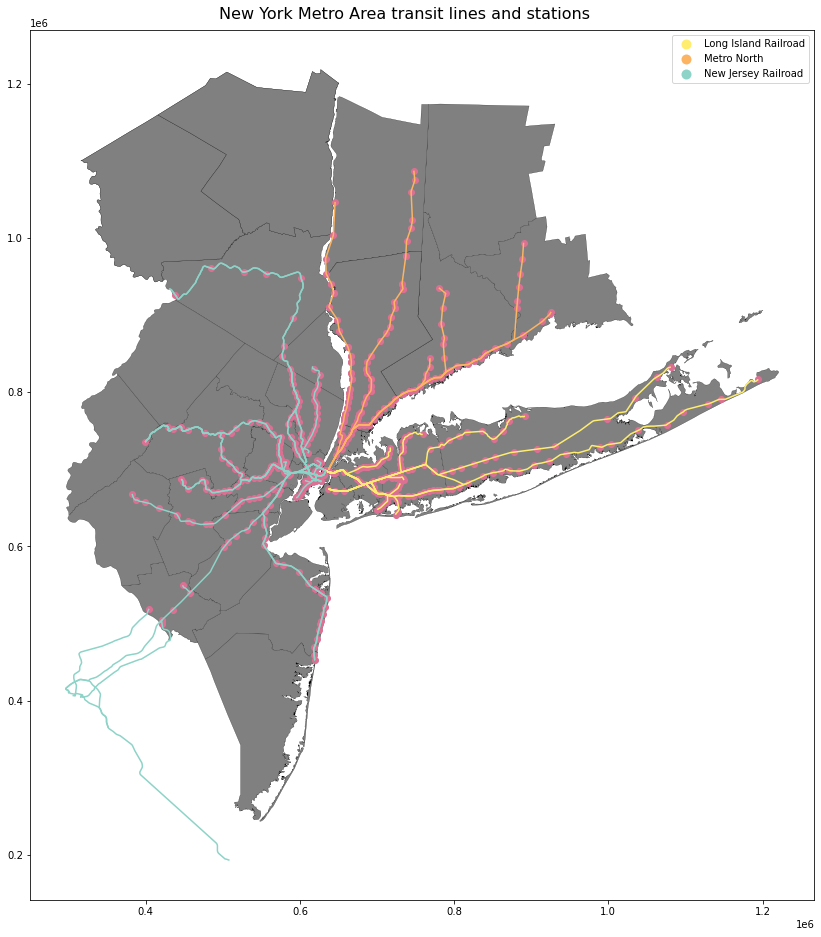

In [64]:
fig, ax = plt.subplots(figsize = (20,16)) 

nymarail.plot(column = 'Operating',cmap = 'Set3_r', legend=True, ax=ax)
cb.geometry.plot(color='Grey', edgecolor='black',linewidth = 0.2,ax=ax)
stationincounty.plot(column = 'name',color='palevioletred', legend=True, ax=ax)
fig.suptitle('New York Metro Area transit lines and stations', fontsize=16,x=0.5,y=0.9)

## Put the stations on a folium map

In [24]:
import folium
m = folium.Map()
m

In [41]:
latitude = nymastation.lat.mean()
latitude

40.7328522284504

In [42]:
longitude = nymastation.lon.mean()
longitude

-74.02803319332598

In [45]:
m = folium.Map(location=[latitude,longitude], tiles='Stamen Terrain', zoom_start=10)
m

In [43]:
for index, row in nymastation.iterrows():
    folium.Marker([row.lat,row.lon], tooltop=row.stationname).add_to(m)

m

In [44]:
nymastation['color'] = ''
nymastation

stationname        lat        lon                       geometry  \
0       Long Island City  40.741280 -73.956390  POINT (642750.072 695409.903)   
1    Hunterspoint Avenue  40.742380 -73.946790  POINT (645407.555 695827.249)   
2           Penn Station  40.750580 -73.993580  POINT (632425.769 698736.255)   
3               Woodside  40.745840 -73.902970  POINT (657540.623 697167.271)   
4           Forest Hills  40.719570 -73.844810  POINT (673726.190 687712.061)   
..                   ...        ...        ...                            ...   
107            Waterbury  41.552728 -73.046126  POINT (890037.103 993921.210)   
108              Milford  41.223231 -73.057647  POINT (888882.385 873815.344)   
109           West Haven  41.271420 -72.963488  POINT (914473.609 891816.634)   
110            New Haven  41.296501 -72.928290  POINT (923983.537 901128.024)   
111         NH-State St.  41.304979 -72.921747  POINT (925725.242 904249.608)   

                Operating color  
0    Long Island Railroad        
1    Long Island Railroad        
2    Long Island Railroad        
3    Long Island Railroad        
4    Long Island Railroad        
..                    ...   ...  
107  Metro North Railroad        
108  Metro North Railroad        
109  Metro North Railroad        
110  Metro North Railroad        
111  Metro North Railroad        

[521 rows x 6 columns]

In [45]:
nymastation.loc[nymastation['Operating'] == 'Long Island Railroad', 'color'] = 'red'
nymastation.loc[nymastation['Operating'] == 'Metro North Railroad', 'color'] = 'blue'
nymastation.loc[nymastation['Operating'] == 'New Jersey Railroad', 'color'] = 'purple'

In [46]:
for index, row in nymastation.iterrows():
    tooltip_text = row.Operating + ' station: ' + row.stationname
    folium.Marker(
        [row.lat,row.lon], 
        popup=row.stationname, 
        tooltip=tooltip_text,
        icon=folium.Icon(color=row.color)
    ).add_to(m)
m

## Put stations on the map with Plotly.Express

In [68]:
nymastation= px.scatter_mapbox(nymastation,
                        lat='lat',
                        lon='lon',
                        color='Operating',
                        hover_name="stationname",
                        mapbox_style="stamen-toner")
nymastation.show()

# Conlusion
In this notebook, I combined three transit lines files and three transit stations files into two dataframs, and explore some mapping options for future analysis on transit system and migration, housing value and economic factors. 
